In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['Species']

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [7]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


#Univariate Analysis

In [8]:
df_setosa = df.loc[df['Species'] == 'Iris-setosa']
df_virginica = df.loc[df['Species'] == 'Iris-virginica']
df_versicolor = df.loc[df['Species'] == 'Iris-versicolor']

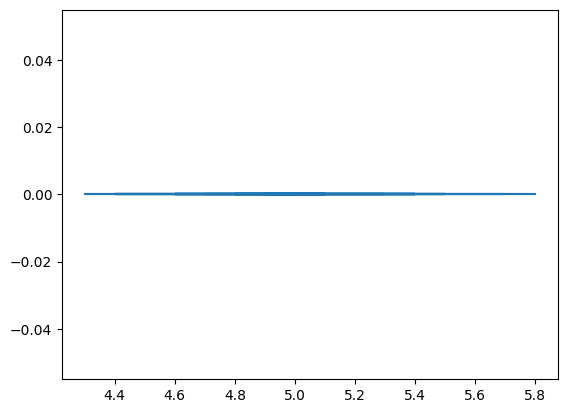

In [9]:
plt.plot(df_setosa['SepalLengthCm'], np.zeros_like(df_setosa['SepalLengthCm']))

# we do univariate, so we use only one feature i.e; sepal lenght i.e; x-axis, we dont use y-axis feature, y-axis data is necessay so we use
# np.zeros_like() function that create 0 array of lenth x by above code

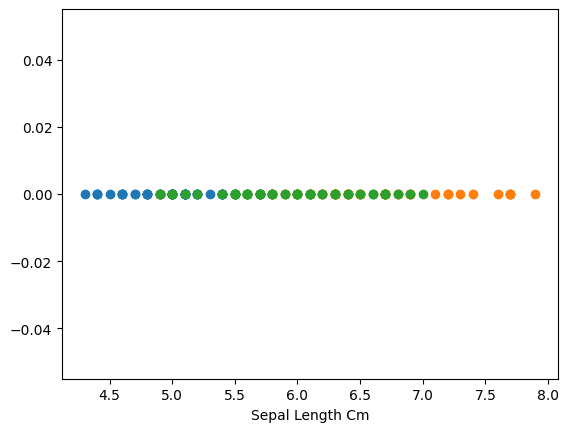

 Blue is Setosa 
 Green is Virginical 
 Orange is Versicolor


In [10]:
plt.plot(df_setosa['SepalLengthCm'], np.zeros_like(df_setosa['SepalLengthCm']), 'o')
plt.plot(df_virginica['SepalLengthCm'], np.zeros_like(df_virginica['SepalLengthCm']), 'o')
plt.plot(df_versicolor['SepalLengthCm'], np.zeros_like(df_versicolor['SepalLengthCm']), 'o')
plt.xlabel("Sepal Length Cm")
plt.show()

print(' Blue is Setosa \n Green is Virginical \n Orange is Versicolor')

# Bivariate Analysis

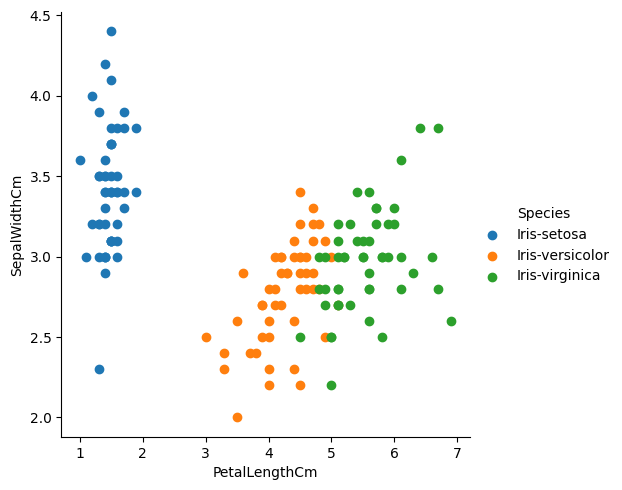

In [11]:
sns.FacetGrid(df, hue="Species", height=5).map(plt.scatter, 'PetalLengthCm', 'SepalWidthCm').add_legend();
plt.show()

#Multivariate Analysis

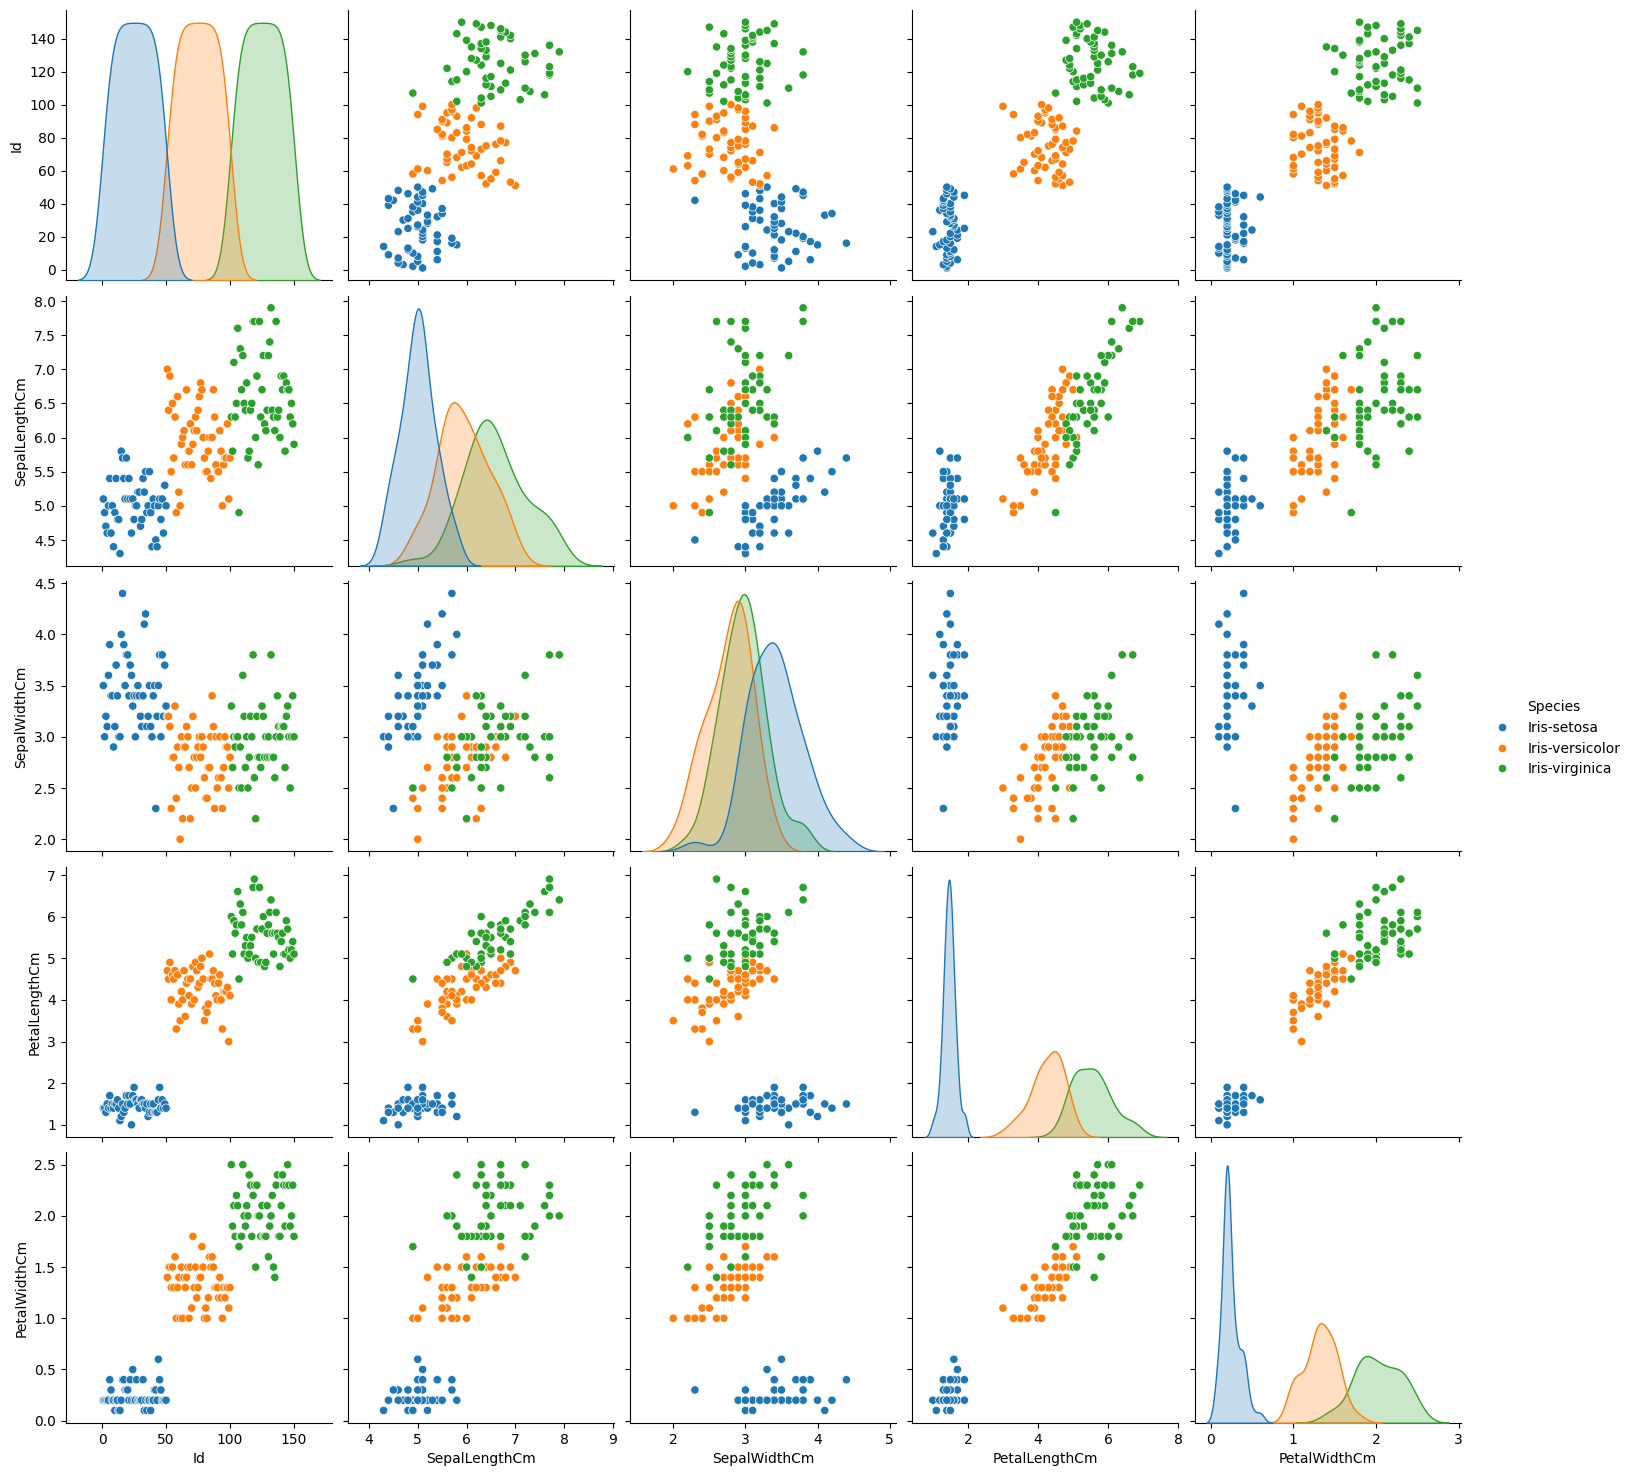

In [12]:
sns.pairplot(df, hue='Species', height=3)
plt.show()

In [13]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name, "Accuracy:", model.score(X_test, y_test))

Logistic Regression Accuracy: 1.0
KNN Accuracy: 1.0
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
SVM Accuracy: 1.0


In [20]:
sample = [[4.9, 5, 1.4, 6.4]]  # Example feature values

for name, model in models.items():
    pred = model.predict(sample)
    print(name, "Predicted Species:", pred[0])


Logistic Regression Predicted Species: Iris-setosa
KNN Predicted Species: Iris-versicolor
Decision Tree Predicted Species: Iris-setosa
Random Forest Predicted Species: Iris-setosa
SVM Predicted Species: Iris-virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
